In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/SMSSpamCollection.csv", sep='\t', header=None, names=["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

## **DATA CLEANING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.sample(5)

,label,message
3069,ham,Boy you best get yo ass out here quick
3302,spam,RCT' THNQ Adrian for U text. Rgds Vatian
1365,ham,Hey i will be really pretty late... You want t...
2977,ham,I love u 2 my little pocy bell I am sorry but ...
310,ham,Where are the garage keys? They aren't on the ...


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['label'])
df.head(5)

,label,message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df.isnull().sum()

,0
label,0
message,0
target,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 3)

## **EDA**

In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


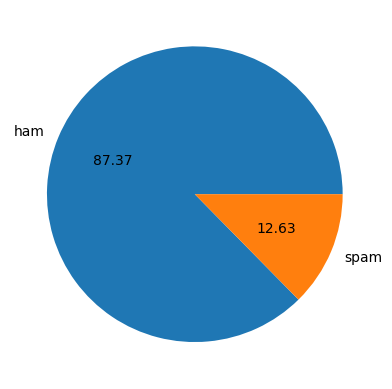

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['text_characters'] = df['message'].apply(len)

In [ ]:
df

,label,message,target,text_characters
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,160
5568,ham,Will ü b going to esplanade fr home?,0,36
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


In [ ]:
df['text_words'] = df['message'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,label,message,target,text_characters,text_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24
1,ham,Ok lar... Joking wif u oni...,0,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,ham,U dun say so early hor... U c already then say...,0,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [ ]:
import seaborn as sns

<Axes: xlabel='text_characters', ylabel='Count'>

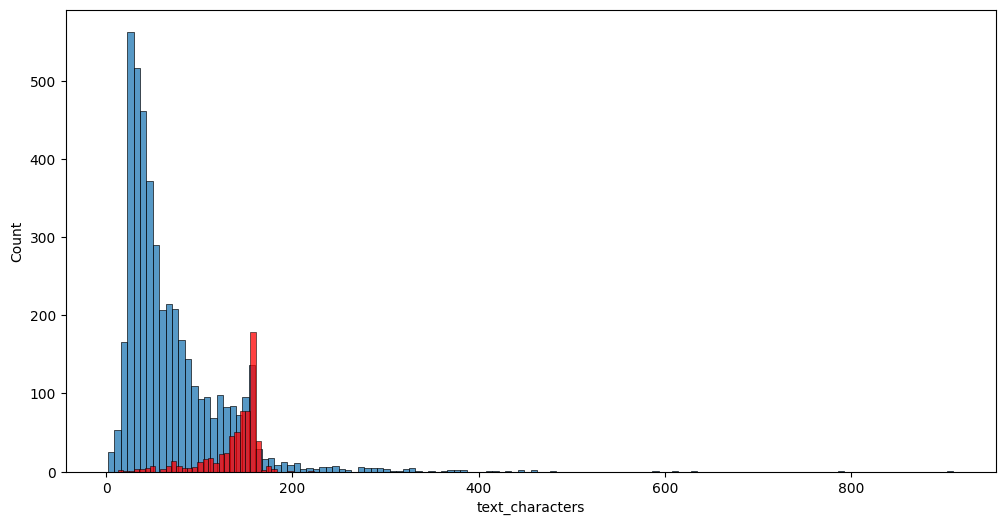

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['text_characters'])
sns.histplot(df[df['target']==1]['text_characters'], color = 'red')

<Axes: xlabel='text_words', ylabel='Count'>

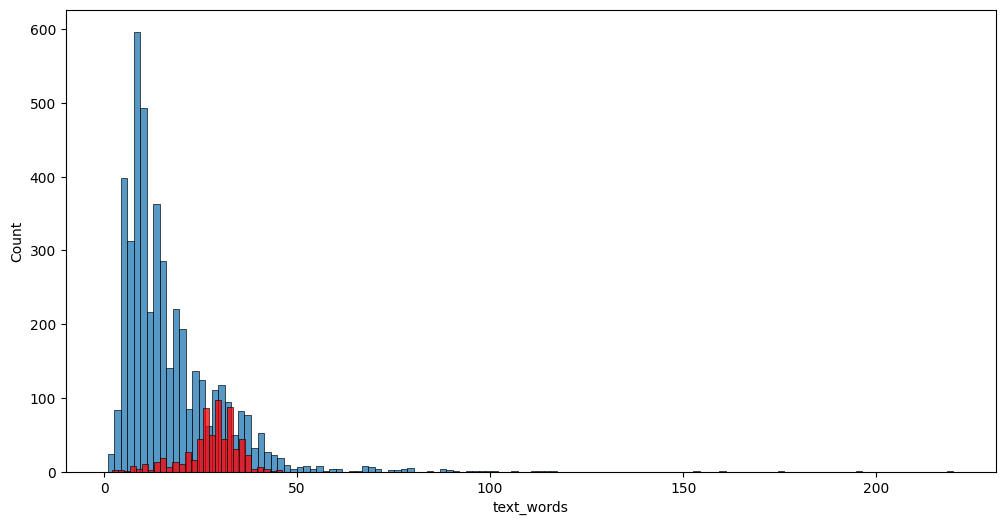

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['text_words'])
sns.histplot(df[df['target']==1]['text_words'], color = 'red')

## **Data Preprocessing**

In [ ]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
import string


# def transform_text(text):
#   text  = str(text).lower()
#   text = nltk.word_tokenize(text)
#   # text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
#   y = []

#   for i in text:
#     if i.isalnum():
#       y.append(i)

#   text = y[:]
#   y.clear()

#   for i in text:
#     if i not in stopwords.words('english') and i not in string.punctuation:
#       y.append(i)

#   text = y[:]
#   y.clear()

#   for i in text:
#     y.append(ps.stem(i))

#   return " ".join(y)


def transform_text(text):
    # Ensure input is a string and not a list/array
    if isinstance(text, (list, np.ndarray)):
        text = text[0] if len(text) > 0 else ''

    text = str(text).lower()  # Lowercase
    text = nltk.word_tokenize(text)  # Tokenize

    # Remove non-alphanumeric tokens
    text = [word for word in text if word.isalnum()]

    # Remove stopwords and punctuation
    text = [word for word in text if word not in stopwords.words('english')]

    # Stemming
    text = [ps.stem(word) for word in text]

    return " ".join(text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
df['transformed_text'] = df['message'].apply(transform_text)

In [ ]:
df.head()

,label,message,target,text_characters,text_words,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 700, height = 700, min_font_size = 13, background_color = 'white')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

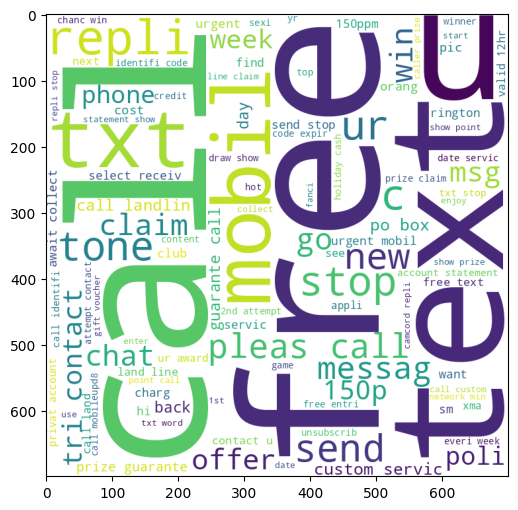

In [ ]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

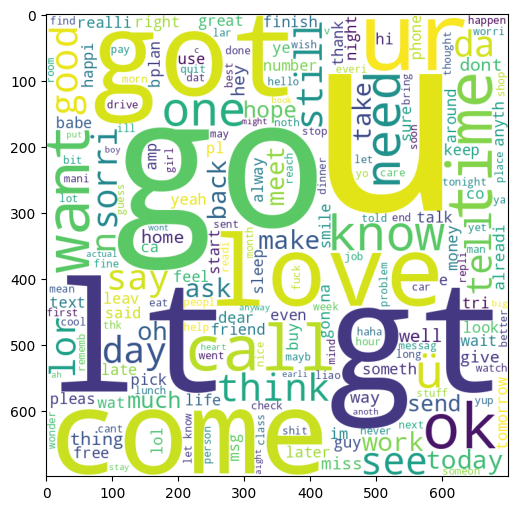

In [ ]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

In [ ]:
df.head()

,label,message,target,text_characters,text_words,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9982

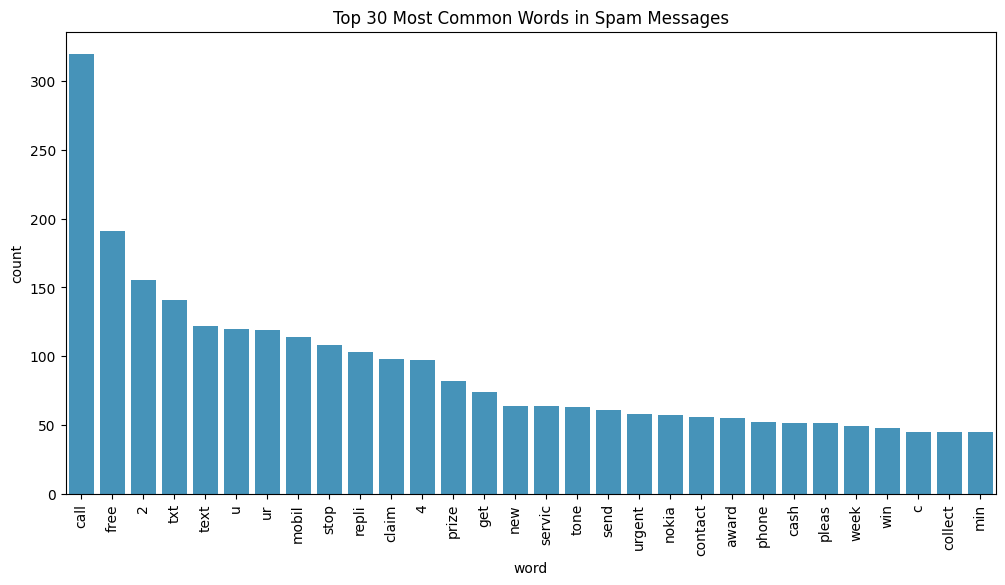

In [ ]:
from collections import Counter
common_words = Counter(spam_corpus).most_common(30)
df_common = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_common, color =(0.2, 0.6, 0.8))
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Messages")
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35939

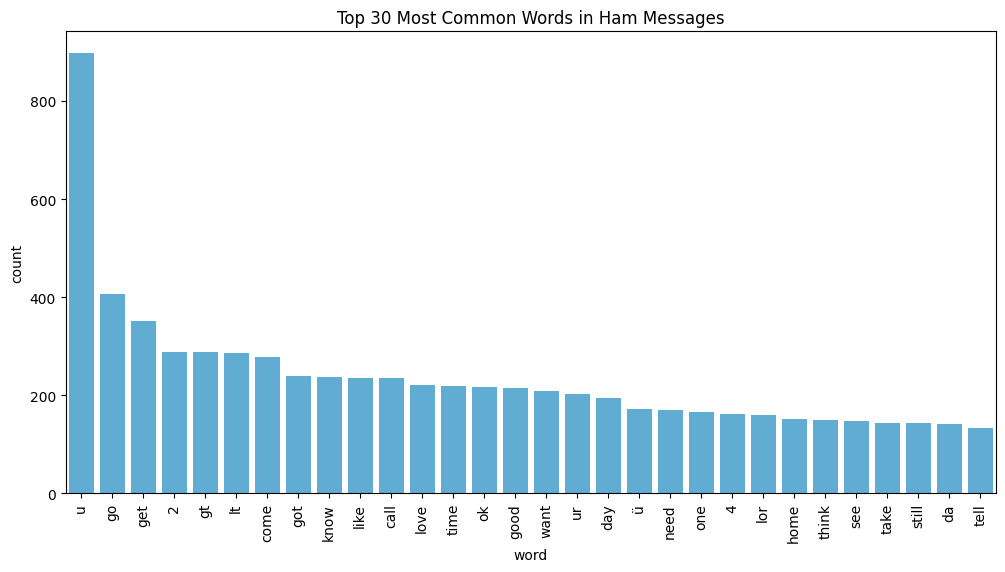

In [ ]:
ham_common_words = Counter(ham_corpus).most_common(30)
df_common = pd.DataFrame(ham_common_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_common, color =(0.3, 0.7, 0.9))
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Ham Messages")
plt.show()

## **Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train, y_train)
y_pred1  =  gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[780 114]
 [ 21 119]]
0.5107296137339056


In [ ]:
mnb.fit(x_train, y_train)
y_pred2  =  mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9748549323017408
[[894   0]
 [ 26 114]]
1.0


In [ ]:
bnb.fit(x_train, y_train)
y_pred3  =  bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9854932301740812
[[894   0]
 [ 15 125]]
1.0


In [ ]:
import joblib
joblib.dump(tfidf, 'vectorizer.pkl')

['vectorizer.pkl']

In [ ]:
joblib.dump(bnb, 'model.pkl')

['model.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)